In [1]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

load_dotenv()

c:\Users\shory\anaconda3\envs\langgraph\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [3]:
from langchain.llms.base import LLM

class GeminiLLM(LLM):
    model: str = "gemini-2.5-flash-preview-05-20"

    def _call(self, prompt: str, stop: list[str] | None = None) -> str:
        response = genai.GenerativeModel(self.model).generate_content(prompt)
        return response.text.strip()

    def invoke(self, input: str, **kwargs) -> str:
        return self._call(input)

    @property
    def _llm_type(self) -> str:
        return "gemini-llm"


In [ ]:
from langgraph.graph import StateGraph, END
from typing import TypedDict

class AgentState(TypedDict):
    input: str
    output: str

# Define node logic
def gemini_node(state: AgentState) -> AgentState:
    prompt = state['input']
    llm = GeminiLLM()
    state['output'] = llm.invoke(prompt)
    return state


In [5]:
# Build graph
graph = StateGraph(AgentState)
graph.add_node("gemini", gemini_node)
graph.set_entry_point("gemini")
graph.set_finish_point("gemini")
app = graph.compile()

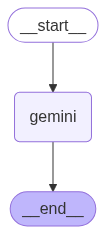

In [6]:
app

In [7]:
# Run the agent
response = app.invoke({
  "input": "Who is the PM of India in 2025?",
  "output":""
  })
print(response["output"])

As of early 2024, the current Prime Minister of India is **Narendra Modi**.

However, the next Indian general election is scheduled to take place in **April-May 2024**. The Prime Minister for 2025 will be determined by the results of that election.

If the Bharatiya Janata Party (BJP) led by Narendra Modi wins a majority, he would continue as PM. If another party or coalition wins, their leader would become the new Prime Minister.
